Building on our initial exploration, we be more quantitative and try to reproduce something like Fig. 2a in the paper, or at least a portion of it subject to the annealing times we can access. We copy the necessary imports and function definitions:

In [2]:
from dwave.system import EmbeddingComposite, DWaveSampler
import networkx as nx # For drawing graphs
import matplotlib.pyplot as plt
import numpy as np

def anneal_1d_chain(J_val, N, ta, n_reads):
    # Construct dictionaries for qubit biases and couplers:
    h = {} # No biases needed
    J = {} # Coupler dictionary
    for i in range(N):
        key_tuple = ('s{}'.format(i), 's{}'.format((i + 1) % N))
        J[key_tuple] = J_val
    sampler = EmbeddingComposite(DWaveSampler()) # Sampler to use, with auto-embedding
    samples = sampler.sample_ising(h, J, num_reads=n_reads, label='Anneal a small spin chain as a test', annealing_time=ta) # Do a single anneal

    return samples

def draw_chain(N, spins):
    plt.figure()
    G = nx.Graph()
    G.add_nodes_from(range(N), spin=spins) # Add spins to graph
    for i in range(N):
        G.add_edge(i, (i + 1) % N)

    nx.draw_circular(G, cmap=plt.get_cmap('bwr'), node_color=spins, node_size=100)

Now we vary the annealing time for a fixed chain length and coupling strength:

In [2]:
import csv

ta = np.logspace(0, 3) #np.linspace(0.5, 2000, 10) # Annealing times in us
J = 1
N = 512
n_reads = 100

def calc_kink_density(sample):
    kink_count = len([x for x in range(1, len(sample)) if sample[x] != sample[x - 1]]) 
    kink_density = kink_count/len(sample)
    return kink_density

average_kink_densities = []
for time in ta:
    samples = anneal_1d_chain(J, N, time, n_reads)
    average_kink_density = 0
    n = 0
    for rec in samples.record:
        average_kink_density += rec[2]*calc_kink_density(rec[0])
        n += rec[2]
    average_kink_densities.append(average_kink_density/n)

np.savetxt('ta.csv', ta, delimiter=',')
np.savetxt('average_kink_densities.csv', average_kink_densities, delimiter=',')
params = {'J':J, 'N': N, 'n_reads': n_reads}

w = csv.writer(open("params.csv", "w"))

for key, val in params.items():
    w.writerow([key, val])

Text(0, 0.5, 'Average kink density')

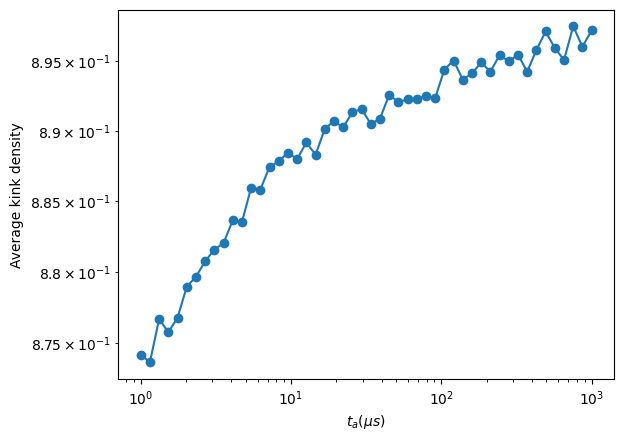

In [6]:
plt.plot(ta, average_kink_densities, '-o')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('$t_a (\mu s)$')
plt.ylabel('Average kink density')

It is not clear that this is working - comparing to Fig. 2 qualitatively in the appropriate annealing time regime, we do indeed see some plateauing increase in the average kink density, but not the decrease after that we would expect, especially as we anneal over longer times than that plot. We have comparable parameters and the code should be working, so it is not clear why the data give such a mixed picture. Let's investigate more parameter values, firstly the number of reads, but also the coupler strength and chain length. We'll also decrease the number of points to save some computational time.

Annealing time = 1.0 us
Annealing time = 1.2689610031679222 us
Annealing time = 1.6102620275609394 us
Annealing time = 2.043359717856942 us
Annealing time = 2.592943797404667 us
Annealing time = 3.2903445623126686 us
Annealing time = 4.1753189365604015 us
Annealing time = 5.298316906283708 us
Annealing time = 6.7233575364993365 us
Annealing time = 8.531678524172808 us
Annealing time = 10.826367338740546 us
Annealing time = 13.73823795883263 us
Annealing time = 17.43328822199988 us
Annealing time = 22.122162910704493 us
Annealing time = 28.072162039411772 us
Annealing time = 35.62247890262442 us
Annealing time = 45.20353656360243 us
Annealing time = 57.36152510448679 us
Annealing time = 72.7895384398315 us
Annealing time = 92.36708571873861 us
Annealing time = 117.21022975334806 us
Annealing time = 148.73521072935117 us
Annealing time = 188.73918221350976 us
Annealing time = 239.5026619987486 us
Annealing time = 303.9195382313198 us
Annealing time = 385.6620421163472 us
Annealing time =

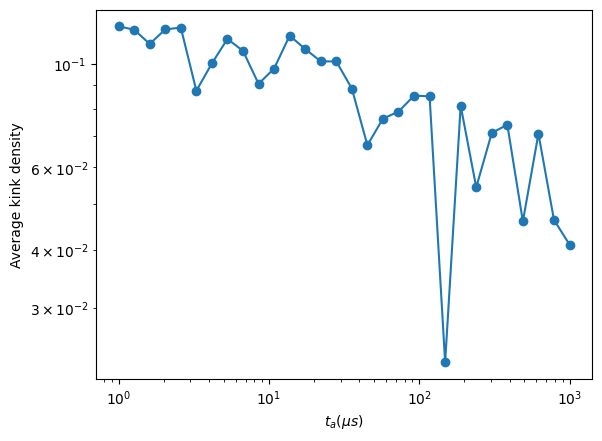

In [4]:
import csv

ta = np.logspace(0, 3, num=30) # Annealing times in us
J = -1
N = 512
n_reads = 100

def calc_kink_density(sample):
    kink_count = len([x for x in range(1, len(sample)) if sample[x] != sample[x - 1]]) 
    kink_density = kink_count/len(sample)
    return kink_density

average_kink_densities = []
for time in ta:
    print('Annealing time = {} us'.format(time))
    samples = anneal_1d_chain(J, N, time, n_reads)
    average_kink_density = 0
    n = 0
    for rec in samples.record:
        average_kink_density += rec[2]*calc_kink_density(rec[0])
        n += rec[2]
    average_kink_densities.append(average_kink_density/n)

np.savetxt('ta.csv', ta, delimiter=',')
np.savetxt('average_kink_densities.csv', average_kink_densities, delimiter=',')
params = {'J':J, 'N': N, 'n_reads': n_reads}

w = csv.writer(open("params.csv", "w"))

for key, val in params.items():
    w.writerow([key, val])

plt.plot(ta, average_kink_densities, '-o')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('$t_a (\mu s)$')
plt.ylabel('Average kink density')
plt.savefig('av kink density vs. anneal time.png')
plt.savefig('av kink density vs. anneal time.eps')